In [8]:
#銀行の顧客データから、新規口座を開設しそうな人を予測
#決定木を採用

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV 

In [10]:
train = pd.read_csv("train.csv")
sample = pd.read_csv("submit_sample.csv", header=None)
test = pd.read_csv("test.csv")

説明変数をtrainX,目的変数をyに代入

In [11]:
trainX = train.iloc[:, : 17]
y = train["y"]

In [12]:
testX = test.copy()

trainXとtestXをダミー変数化して再度代入

In [13]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

 変数名をclf1とし、DT()を代入

In [15]:
clf1 = DT()

グリッドサーチクロスバリデーションのパラメーターを決める
最初はmax_depthのみ

In [16]:
parameters = {"max_depth": list(range(2, 11))}

In [17]:
gcv = GridSearchCV(clf1, parameters, cv=5, scoring="roc_auc", n_jobs=-1)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

結果を表示

In [19]:
gcv.cv_results_

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

{'mean_fit_time': array([0.03526564, 0.05852799, 0.08754292, 0.11010513, 0.13842936,
        0.15159483, 0.17564015, 0.18810196, 0.16934648]),
 'std_fit_time': array([0.00036839, 0.01050614, 0.0025362 , 0.00457443, 0.01406808,
        0.01188461, 0.02046482, 0.01673482, 0.01793412]),
 'mean_score_time': array([0.06117377, 0.05405521, 0.00518475, 0.00418863, 0.0045877 ,
        0.00737934, 0.00398889, 0.00498581, 0.00359039]),
 'std_score_time': array([2.02069031e-03, 5.91799625e-02, 1.93343314e-03, 7.46391143e-04,
        4.88655810e-04, 5.30039333e-03, 6.14361702e-07, 6.30451381e-04,
        4.88655624e-04]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_

mean train score と　mean test score の乖離するポイントを可視化

In [22]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


([<matplotlib.axis.XTick at 0x22b932102e8>,
 <a list of 8 Text xticklabel objects>)

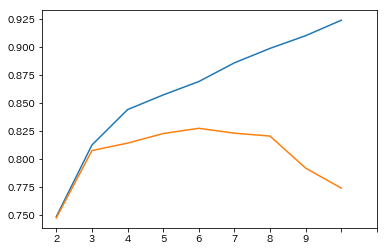

In [24]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(10)), list(range(2, 10)))

In [25]:
gcv.best_params_

{'max_depth': 6}

確率を求め、sampleに代入

In [26]:
pred = gcv.predict_proba(testX)

In [27]:
pred = pred[:, 1]
sample[1] = pred
sample.to_csv("submit_bank.csv", index=None, header=None)

次はmax_depthとmin_samples_leafを調整

In [28]:
clf2 = DT()

In [30]:
parameters2 = {"max_depth": list(range(2, 11)), "min_samples_leaf": [5, 10, 20, 50, 100, 200, 500]}

In [33]:
gcv2 = GridSearchCV(clf2, parameters2, cv=5, scoring="roc_auc", n_jobs=-1)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [5, 10, 20, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [34]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [35]:
pred = gcv2.predict_proba(testX)

In [36]:
pred = pred[:, 1]
sample[1] = pred
sample.to_csv("submit_bank2.csv", index=None, header=None)